### 선형회귀 이해하기
- 성적데이터를 기반으로 선형회귀를 이해해보자

In [1]:
# 성적 데이터 생성을 위한 라이브러리 꺼내오기
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# warning 문구 제거
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 성적 데이터 생성
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index=['준영','종화','경민','승훈'], columns=['시간','성적'])

### MSE가 최소가 되는 최적의 w,b를 찾는 방법
- MSE : 평균제곱오차(Mean Squared Error) --> 비용함수(cost)
- 1. 수학공식을 이용한 해석적 모델
- 2. 경사하강법(XGBoost에서 오차 계산하는 방법)

### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression
- 공식을 이용해서 적은 계산으로 한번에 최적의 선형함수를 찾는 방법
- 공식이 완벽하지 않을경우 잘 못 찾을수도 있고,
- 공식이 잘못되었을 경우 고칠 수 없다는 단점이 있다. ==> 추후 규제를 접목하여 개선가능하다.

In [4]:
from sklearn.linear_model import LinearRegression

In [7]:
# 모델 생성 및 하이퍼파라미터 설정 - 하이퍼파라미터 적용 X
linear_model = LinearRegression()

# 학습
linear_model.fit(data[['시간']], data['성적'])
# data[['시간']] : 문제데이터, 2차원으로 생성
# data['성적'] : 정답데이터, 1차원으로 생ㅇ성

LinearRegression()

### y=wx+b (1개의 문제)

In [8]:
# 기울기, 가중치 출력 - w
print('기울기, 가중치 : ', linear_model.coef_)
# 절편, 편향 출력 - b
print('절편, 편향 : ', linear_model.intercept_)

기울기, 가중치 :  [10.]
절편, 편향 :  7.105427357601002e-15


In [12]:
# 예측 - 7시간 공부했을 때 몇점 일까?
linear_model.predict([[7]])

array([70.])

### H(x)
-가설함수

In [13]:
# 함수정의
# 매개변수 : 가중치, 문제
def h(w,x) :
    return w * x + 0

### 비용함수(Cost Function)
- 비용 = 오차

In [14]:
# 비용함수 정의
# data : 문제 값
# target : 정답(실제 값)
# weight : 가중치

def cost(data, target, weight) :
    # 예측하는 값
    y_pre = h(weight, data)
    # 평균제곱오차 = ((예측값 - 실제값)**2).mean()
    error = ((y_pre - target) **2).mean()
    return error

In [19]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'], 7)

371.25

In [20]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'], 8)

165.0

In [21]:
# 가중치에 따른 오차값 확인
cost(data['시간'], data['성적'], 10)

0.0

In [24]:
# 가중치 변화에 따른 비용함수의 변화를 그래프로 확인
cost_list = []

for w in range(1,16) :
    err=cost(data['시간'], data['성적'], w)
    cost_list.append(err)
cost_list

[3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25]

<function matplotlib.pyplot.show(close=None, block=None)>

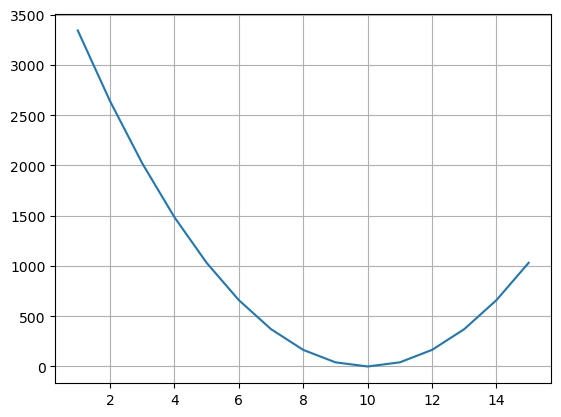

In [26]:
plt.plot(range(1,16), cost_list)
plt.grid()
plt.show

In [27]:
linear_model.score(data[['시간']], data['성적'])

# 분류모델에서 score 는 정확도
# 회귀모델에서 score(MSE를 기반으로한 R2score) 는 유사도 : -1 ~ 1

1.0

### 2. 경사하강법
- SGDRegressor
- 점진적으로 오차가 작은 선형함수를 찾아가는 방법
- 오차를 수정하는 방향으로 그래프를 다시 그려준다
- 선형함수를 잘못 찾았을 경우 수정이 가능하다
- 점진적으로 찾아가므로 계산량이 많아서 시간이 오래 걸린다.
- 학습율(learning rate)
    - 너무 크게 설정하면 오차가 커진다(발산)
    - 너무 작게 설정하면 국소지역점에 빠져서 최적의 해를 찾지 못한다.

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
# 모델 생성 및 하이퍼파라미터 설정
sgd_model = SGDRegressor(max_iter=5000, # max_iter : 가중치 업데이트 반복 횟수
                         eta0 = 0.001, # eta0 : 학습률(learning rate)
                         verbose = 1)

# 학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.27, NNZs: 1, Bias: 0.176580, T: 4, Avg. loss: 1896.040925
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 1, Bias: 0.296711, T: 8, Avg. loss: 1467.919165
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.81, NNZs: 1, Bias: 0.393454, T: 12, Avg. loss: 1199.342083
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.39, NNZs: 1, Bias: 0.474889, T: 16, Avg. loss: 996.027353
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.90, NNZs: 1, Bias: 0.545143, T: 20, Avg. loss: 840.377781
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 1, Bias: 0.606999, T: 24, Avg. loss: 714.363003
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.74, NNZs: 1, Bias: 0.661788, T: 28, Avg. loss: 612.701368
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.09, NNZs: 1, Bias: 0.711057, T: 32, Avg. loss: 527.916188
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.41, NNZs: 1, Bias: 0.755340, T: 36, Avg. loss: 457.656618
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [ ]:
# Early stopping : 크게변화하는 값이 없을 때 학습을 임의 종료 한다.

In [30]:
# 예측
sgd_model.predict([[7]])

array([69.88616242])

In [31]:
# 가중치(w), 편향(b) 확인하기
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.79301104]
[1.33508517]


In [32]:
sgd_model.score(data[['시간']], data['성적'])

# 1에 가까울수록 모델이 예측한 성능이 높다고 판단 한다.

0.9995459121892355